# EDA I (Indian Premier League) I (Sports Analysis)

###### Objective

- As a Sports Analyst, we need to find out the most successful Teams, Players and certain factors contibuting the win and loss.
- Also, we need to suggest some teams or players so that a Company should endorse the player or the Team for its products.

In [461]:
# Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [462]:
ipl = pd.read_csv(r"C:\Users\Himanshu Nautiyal\Downloads\TSF\DATA\matches.csv") 

In [463]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [464]:
ipl.shape

(756, 18)

In [465]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

<AxesSubplot:title={'center':'Most Wins'}, xlabel='Winner'>

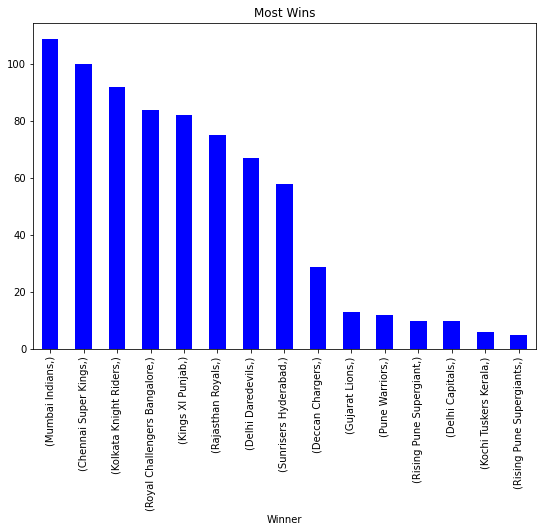

In [466]:
ipl_winner = pd.DataFrame({"Winner": ipl["winner"]})
plt.figure(figsize=(9,6))
ipl_winner.value_counts().plot(kind ='bar', title = 'Most Wins', color ='b')

###### DATA CLEANING 

In [470]:
# look for Duplicate Data
ipl.duplicated().sum()

0

# EDA

###### Look for Famous/Top IPL Venues 

<AxesSubplot:title={'center':'Top_10 Famous Venue'}>

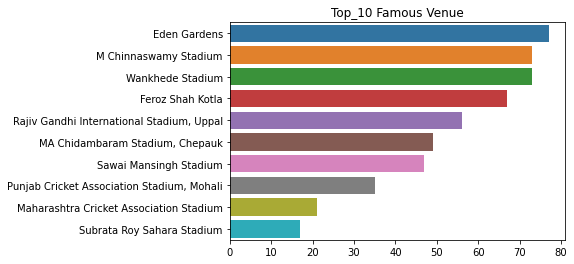

In [473]:
x = list(ipl["venue"].value_counts()[0:10])
y = list(ipl["venue"].value_counts()[0:10].keys())
plt.title("Top_10 Famous Venue")
sns.barplot(x=x , y =y, data = ipl)


###### 2. Player with MOST Man of the maches Title

In [474]:
# Getting the frequency of most "Man of the Match" awards 
ipl['player_of_match'].value_counts()[0:10].to_frame()

,player_of_match
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
V Kohli,12


In [475]:
# Looking for Top 5 'Man of the Match' awardee 
ipl['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: player_of_match, dtype: int64

In [476]:
# Categorical Values for Bar Plot
list(ipl['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'RG Sharma', 'DA Warner']

In [477]:
# Numerical Values for Bar Plot
list(ipl['player_of_match'].value_counts()[0:5])

[21, 20, 17, 17, 17]

###### TOP-5 Man of the Match Player

Text(0.5, 1.0, 'TOP 5 Man of the Match')

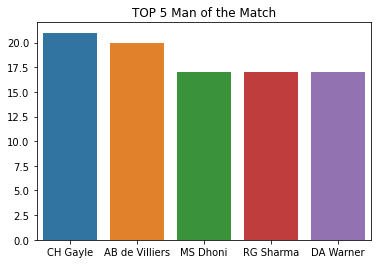

In [261]:
# Now, plotting Bar-Graphs for "Man of the Match" Award

x = list(ipl['player_of_match'].value_counts()[0:5].keys())
y =list(ipl['player_of_match'].value_counts()[0:5])
sns.barplot(x=x,y=y,data=ipl)
plt.title("TOP 5 Man of the Match")



In [270]:
# Getting the frequency of "Result"/Outcome of the Mactches
ipl["result"].value_counts().to_frame()

,result
normal,743
tie,9
no result,4


In [73]:
# We can see, there are the 3 categories in the Result Column i.e. Normal, Tie and No Result.

###### 3. Team with max Toss- Wins

In [71]:
# Finding out number of Toss Wins w.r.t. each Team
ipl["toss_winner"].value_counts().to_frame()

,toss_winner
Mumbai Indians,98
Kolkata Knight Riders,92
Chennai Super Kings,89
Royal Challengers Bangalore,81
Kings XI Punjab,81
Rajasthan Royals,80
Delhi Daredevils,80
Sunrisers Hyderabad,46
Deccan Chargers,43
Pune Warriors,20


###### 4. Topmost Teams- batted First and won

In [478]:
# Extracting records where a Team won by batting First
batting_first = ipl[ipl['win_by_runs']!= 0]

batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

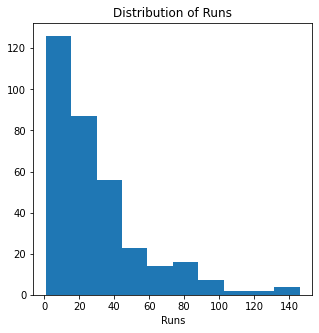

In [13]:
# Making a Histogram
plt.figure(figsize=(5,5))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show

In [479]:
batting_first["winner"].value_counts().to_frame()

,winner
Mumbai Indians,57
Chennai Super Kings,52
Kings XI Punjab,38
Kolkata Knight Riders,36
Royal Challengers Bangalore,35
Sunrisers Hyderabad,30
Rajasthan Royals,27
Delhi Daredevils,25
Deccan Chargers,18
Pune Warriors,6


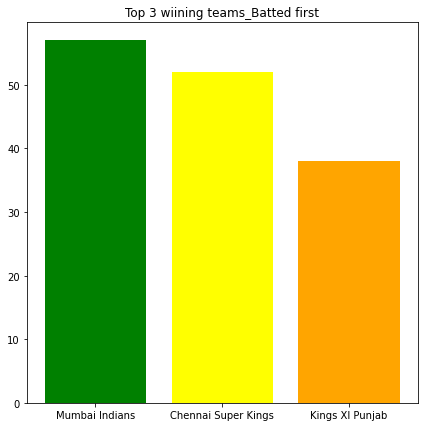

In [80]:
# Making a bar-plot for Top 3 teams with most wins who batted First
plt.figure(figsize=(7,7))
plt.bar(list(batting_first["winner"].value_counts()[0:3].keys()),list(batting_first["winner"].value_counts()[0:3]),color = ["green","yellow", "orange"])
plt.title("Top 3 wiining teams_Batted first")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

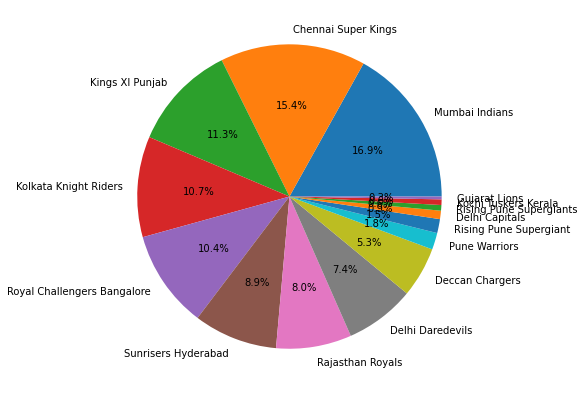

In [16]:
# Making a Pie-chat for showing Win percentage 
plt.figure(figsize=(7,7))
plt.pie(list(batting_first["winner"].value_counts()), labels = list(batting_first["winner"].value_counts().keys()), autopct ='%0.1f%%')
plt.show


######  Extracting records after batting second

In [480]:
batting_second = ipl[ipl['win_by_wickets']!= 0]

batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

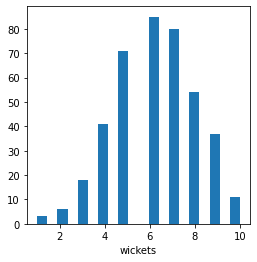

In [77]:
plt.figure(figsize=(4,4))
plt.hist(batting_second['win_by_wickets'],bins = 20)
plt.xlabel("wickets")
plt.show

###### 5. Topmost Teams- batted Second and won (While Chasing)

In [96]:
# Teams who won maximum awards while batting second(Chasing)
batting_second["winner"].value_counts().to_frame()

,winner
Kolkata Knight Riders,56
Mumbai Indians,50
Chennai Super Kings,48
Royal Challengers Bangalore,48
Rajasthan Royals,46
Delhi Daredevils,42
Kings XI Punjab,42
Sunrisers Hyderabad,27
Gujarat Lions,12
Deccan Chargers,11


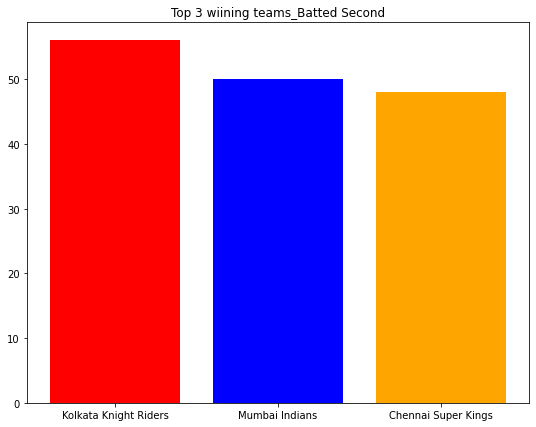

In [94]:
# Making a bar-plot for Top 3 teams with most wins who batted Second
plt.figure(figsize=(9,7))
plt.bar(list(batting_second["winner"].value_counts()[0:3].keys()),list(batting_second["winner"].value_counts()[0:3]),color = ["Red","blue","orange"])
plt.title("Top 3 wiining teams_Batted Second")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

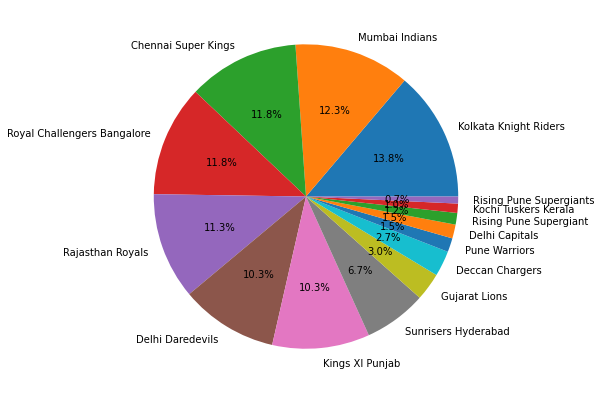

In [95]:
# Making a Pie-chat for showing Win percentage 
plt.figure(figsize=(7,7))
plt.pie(list(batting_second["winner"].value_counts()), labels = list(batting_second["winner"].value_counts().keys()), autopct ='%0.1f%%')
plt.show

###### From here, we can clearly see that KKR,MI and CSK and are the top 3 teams who won while chasing. However, there is a Tie between CSK and RCB for 3rd position. 

In [545]:
# Looking at the number of matches played each season 
ipl['season'].value_counts().to_frame()

,season
2013,76
2012,74
2011,73
2019,60
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59


From here, we can see 2013 is the year with Max matches followed by 2012,2011 abd so on. 

#### 6. Bottom 05 IPL cities 

<AxesSubplot:title={'center':'Top 5 IPL_Cities'}>

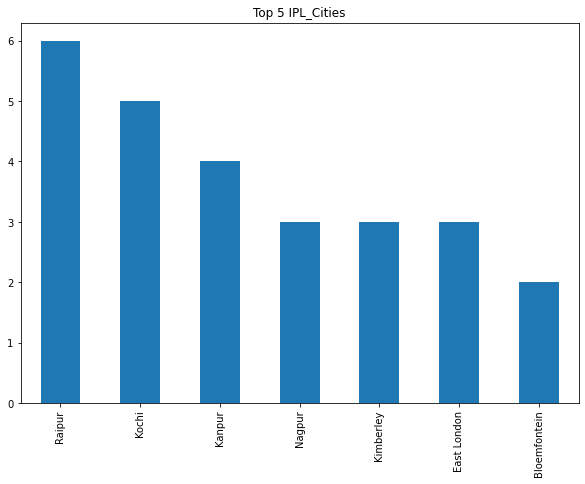

In [546]:
# Looking for number of matches played in each city
plt.figure(figsize=(10,7))
ipl["city"].value_counts()[-7:].plot(kind= 'bar', title = 'Top 5 IPL_Cities')

###### Now we are looking for any relationship between Winning Team and Tosses 


In [547]:
# with the help of Boleans 
np.sum(ipl['toss_winner']==ipl['winner'])


393

In [548]:
# As there are total 756 matches,
pct = round(393/756*100)
print("Chances of winning a Match after winnig the Toss:"+" "+str(pct) + "%")

Chances of winning a Match after winnig the Toss: 52%


###### NOW ANALYSING DATA ON DELIVERIES

In [549]:
deliveries =  pd.read_csv(r"C:\Users\Himanshu Nautiyal\Downloads\TSF\DATA\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


The above data of deliveries shows us the Ball by Ball information

In [550]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [551]:
deliveries["match_id"].nunique()

756

The total number of matches played are 756. From here, we can correlate b/w the match Ids of "Matches" and "Deliveries" Datasets

In [552]:
match_1 = deliveries[deliveries["match_id"]==1]
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [553]:
match_1.shape

(248, 21)

There must be 240 balls delivered from both sides. However, there are 8 more extras which makes it 248

In [554]:
srh=match_1[match_1["inning"]==1]

In [555]:
srh.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


###### It means , there are total 125 balls in the first innings which was batted by Sunrisers  Hyd(SRH) i.e. 05 extra balls 

In [556]:
srh["batsman_runs"].value_counts().to_frame()

,batsman_runs
1,57
0,32
4,17
6,9
2,9
3,1


In [557]:
srh['dismissal_kind'].value_counts().to_frame()

,dismissal_kind
caught,3
bowled,1


In [558]:
rcb=match_1[match_1['inning']==2]

In [559]:
rcb.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [560]:
rcb["batsman_runs"].value_counts().to_frame()

,batsman_runs
0,49
1,44
4,15
6,8
2,7


In [561]:
rcb['dismissal_kind'].value_counts().to_frame()

,dismissal_kind
caught,6
run out,2
bowled,2


In [562]:
ipl.describe(include ='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2016-05-22,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,O Nandan
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [563]:
deliveries.describe(include ='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


###### 7. TOP 10 Bowlers

<AxesSubplot:xlabel='dismissal_kind,bowler'>

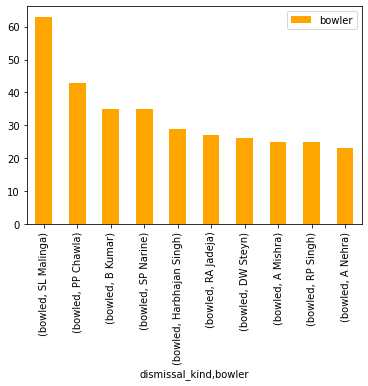

In [572]:

bol= deliveries.groupby('dismissal_kind')['bowler'].value_counts()[0:10].to_frame().plot(kind = 'bar', color = 'orange')
bol

###### 8. TOP 10 fielders 

In [565]:
deliveries['fielder'].value_counts()[0:10].to_frame().T

,MS Dhoni,KD Karthik,RV Uthappa,SK Raina,AB de Villiers,PA Patel,RG Sharma,V Kohli,KA Pollard,WP Saha
fielder,159,152,125,115,114,97,92,90,85,82


<AxesSubplot:title={'center':'Top_10 Fielders'}>

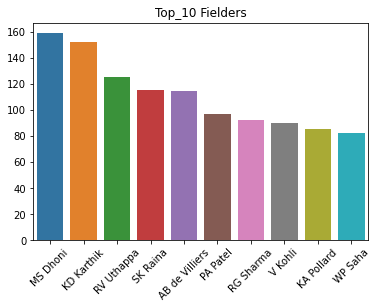

In [566]:
x= list(deliveries['fielder'].value_counts()[0:10].keys())
y= list(deliveries['fielder'].value_counts()[0:10])
plt.xticks(rotation=45)
plt.title("Top_10 Fielders")
sns.barplot(x=x,y=y, data = deliveries)

In [567]:
deliveries['dismissal_kind'].value_counts().to_frame()

,dismissal_kind
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


###### Other Misc Parameters based on numbers 

In [568]:
analysis = pd.DataFrame(deliveries.groupby(['total_runs'])[['bye_runs','legbye_runs','penalty_runs',"batsman_runs",'extra_runs']].sum())
analysis

,bye_runs,legbye_runs,penalty_runs,batsman_runs,extra_runs
total_runs,,,,,
0,0,0,0,0,0
1,285,2251,0,66144,6915
2,95,557,0,24127,2123
3,6,48,0,1831,233
4,394,802,0,81138,1258
5,0,20,5,602,1093
6,0,3,0,48853,35
7,0,0,5,222,44
8,104,104,0,289,223


In [569]:
y= deliveries['player_dismissed'].value_counts()[0:10].to_frame()
y

,player_dismissed
SK Raina,162
RG Sharma,155
RV Uthappa,153
V Kohli,143
S Dhawan,137
G Gambhir,136
KD Karthik,135
PA Patel,126
AM Rahane,116
SR Watson,115


In [570]:
ipl["toss_decision"].value_counts().to_frame()

,toss_decision
field,463
bat,293


###### Conclusion:-
#As a sports analyst, my observations are as follows:-

##### These are the Most Successful Teams and Players 
- We have seen that Most successful Teams for all the seasons are 1. MI, 2.CSK, 3. KKR 4. Kings XI, 5.RR.
- For Top Players # Batsman :- 1.'CH Gayle', 2.'AB de Villiers', 3.'MS Dhoni', 4.'RG Sharma', 5.'DA Warner'
- Top Bowlers:- 1. SL Malinga,2. P Chawla, 3.B Kumar, 4.SP Narein ,5.H. Singh
- Top Fielders :- 1. MS Dhoni , 2. Kartik 3. Utthapa, 4.SK Raina, 5. AB De Villers

#### Hence, Companies should focus on these players to gain more business by endorsing them.


###### OTHER recommendations;
- Please note : point no. 06 , where cities like Kanpur, Kochi, Nagpur comes under Bottom 7 w.r.t. matches played in these cities. Companies should focus on these cities and they should get more infra and other things to come up in the top order or in the middle of the list. It would surely uplift the bottom cities and motivates their state level players. 

###### THANKS